

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dhshah1112/CMPE258/blob/main/Assignment5/CMPE258_Assignment5_A.ipynb)



In [1]:
import numpy as np
import matplotlib.pyplot as plt


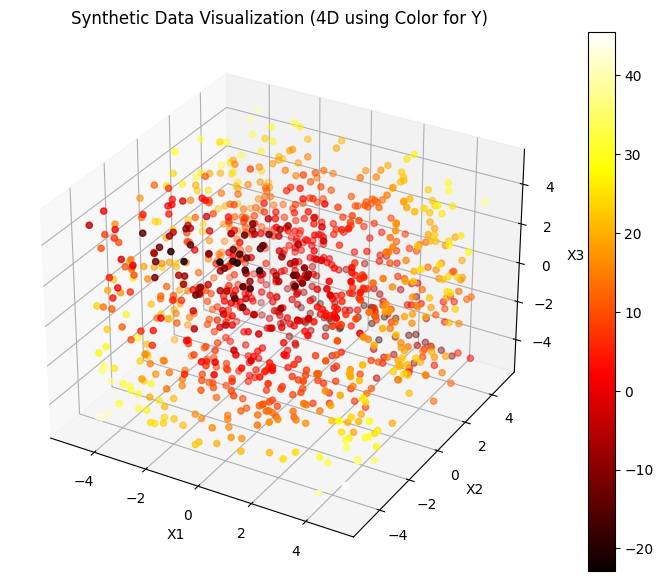

In [2]:
def generate_data(num_samples):
    np.random.seed(0)
    x1 = np.random.uniform(-5, 5, num_samples)
    x2 = np.random.uniform(-5, 5, num_samples)
    x3 = np.random.uniform(-5, 5, num_samples)
    y = x1 ** 2 + x2 * x3 + np.sin(x1 * x2)
    X = np.stack([x1, x2, x3], axis=1)
    return X, y

X, y = generate_data(1000)
y = y.reshape(-1, 1)  # Reshape y to match output dimensions

# Plotting
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
p = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.flatten(), cmap='hot')
fig.colorbar(p)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.title('Synthetic Data Visualization (4D using Color for Y)')
plt.show()


In [3]:
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(input_size, hidden_size) * 0.1
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, hidden_size) * 0.1
    b2 = np.zeros((1, hidden_size))
    W3 = np.random.randn(hidden_size, output_size) * 0.1
    b3 = np.zeros((1, output_size))
    return [W1, b1, W2, b2, W3, b3]

params = initialize_parameters(3, 64, 1)


In [4]:
def relu(Z):
    return np.maximum(0, Z)

def forward_propagation(X, params):
    W1, b1, W2, b2, W3, b3 = params
    Z1 = np.einsum('ij,jk->ik', X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.einsum('ij,jk->ik', A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.einsum('ij,jk->ik', A2, W3) + b3
    return Z3, [Z1, A1, Z2, A2, Z3]


In [5]:
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)


In [6]:
def relu_derivative(Z):
    return Z > 0

def backpropagation(X, y, params, cache):
    W1, b1, W2, b2, W3, b3 = params
    Z1, A1, Z2, A2, Z3 = cache
    m = y.shape[0]

    # Derivatives of the last layer
    dZ3 = 2 * (Z3 - y) / m
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    # Derivatives of the second layer
    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    # Derivatives of the first layer
    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    grads = [dW1, db1, dW2, db2, dW3, db3]
    return grads


In [7]:
def update_parameters(params, grads, learning_rate=0.01):
    W1, b1, W2, b2, W3, b3 = params
    dW1, db1, dW2, db2, dW3, db3 = grads

    W1_updated = W1 - learning_rate * dW1
    b1_updated = b1 - learning_rate * db1
    W2_updated = W2 - learning_rate * dW2
    b2_updated = b2 - learning_rate * db2
    W3_updated = W3 - learning_rate * dW3
    b3_updated = b3 - learning_rate * db3

    updated_params = [W1_updated, b1_updated, W2_updated, b2_updated, W3_updated, b3_updated]
    return updated_params


In [10]:
epochs = 1000
learning_rate = 0.01
losses = []

for epoch in range(epochs):
    y_pred, cache = forward_propagation(X, params)
    loss = compute_loss(y, y_pred)
    losses.append(loss)
    grads = backpropagation(X, y, params, cache)
    params = update_parameters(params, grads, learning_rate)

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss}')


Epoch 0, Loss: 2.9619427824089053
Epoch 100, Loss: 2.726616547008098
Epoch 200, Loss: 2.5713193652167714
Epoch 300, Loss: 2.3919326744726606
Epoch 400, Loss: 2.2332654134217855
Epoch 500, Loss: 2.0932658735842
Epoch 600, Loss: 2.0706739200244333
Epoch 700, Loss: 1.9578628695357148
Epoch 800, Loss: 1.9004950804134138
Epoch 900, Loss: 1.838471416827359


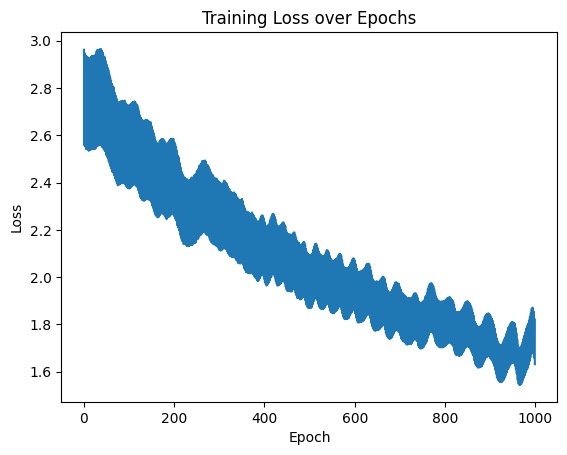

In [11]:
plt.plot(losses)
plt.title('Training Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


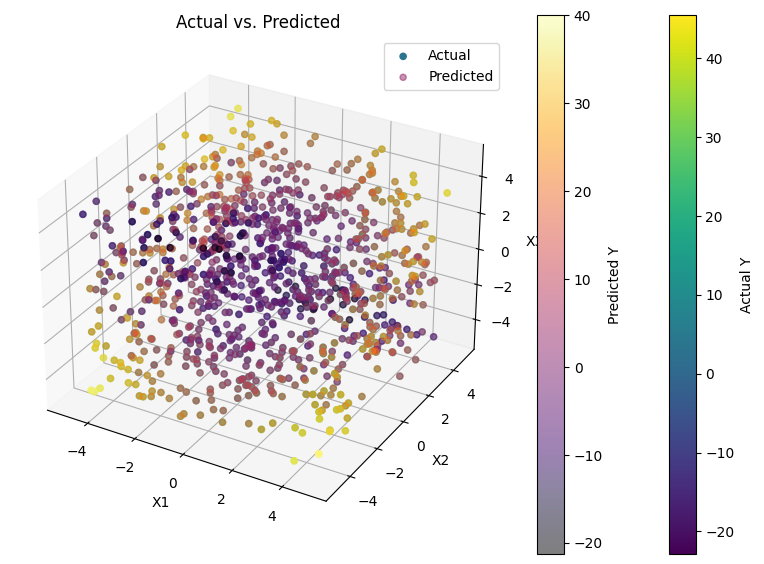

In [12]:
# Predict using the final parameters
final_y_pred, _ = forward_propagation(X, params)

# Creating the plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Actual values
img1 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.flatten(), cmap='viridis', label='Actual')
# Predicted values
img2 = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=final_y_pred.flatten(), cmap='inferno', alpha=0.5, label='Predicted')

# Creating a legend and titles
plt.title('Actual vs. Predicted')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
fig.colorbar(img1, label='Actual Y')
fig.colorbar(img2, label='Predicted Y')
plt.legend()
plt.show()
